### 사전준비

In [1]:
# 기본 패키지
import numpy as np 
import pandas as pd 
import scipy as sp 

import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 머신러닝 패키지 import
import statsmodels.api as sm 
import sklearn as sk

In [3]:
# 한글 설정, 마이너스 표시 가능하게 하기
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font = 'Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### MNIST 다운로드

In [4]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [5]:
(train_input, train_target), (test_input, test_target) = load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
# MNIST 이미지 표현
def show_images(dataset, label, nrow, ncol):
    # 캔버스 설정
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol, 2*nrow))
    ax = axes.ravel()

    xlabels = label[0:nrow*ncol]

    for i in range(nrow*ncol):
        image = dataset[i]
        ax[i].imshow(image, cmap='gray_r')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    plt.tight_layout
    plt.show()

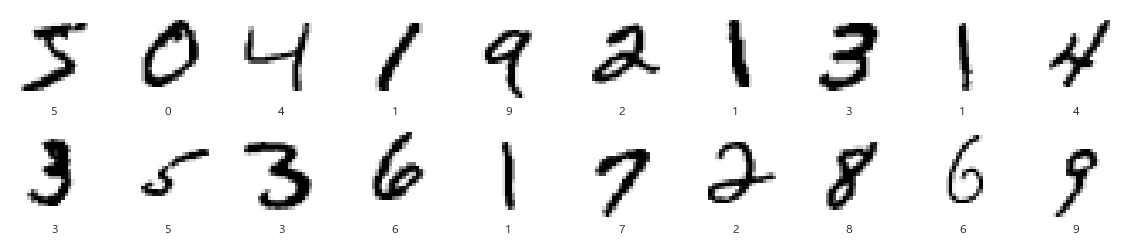

In [9]:
show_images(train_input, train_target,2,10)

In [25]:
model = keras.Sequential(name='ANN')
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu',name='hidden'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax',name='output'))
model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 255.0 나눠서 0~1로 값 축소하는 일은 암함
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_ann_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target),
                    batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
599/600 [============================>.] - ETA: 0s - loss: 4.5957 - accuracy: 0.6150
Epoch 1: val_loss improved from inf to 0.82369, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 2s 3ms/step - loss: 4.5899 - accuracy: 0.6152 - val_loss: 0.8237 - val_accuracy: 0.8054
Epoch 2/20
594/600 [============================>.] - ETA: 0s - loss: 0.9022 - accuracy: 0.7578
Epoch 2: val_loss improved from 0.82369 to 0.56226, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 2s 3ms/step - loss: 0.9020 - accuracy: 0.7578 - val_loss: 0.5623 - val_accuracy: 0.8786
Epoch 3/20
578/600 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.8117
Epoch 3: val_loss improved from 0.56226 to 0.47600, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 1s 2ms/step - loss: 0.6881 - accuracy: 0.8124 - val_loss: 0.4760 - val_accuracy: 0.9058
Epoch 4/20
589/600 [========================

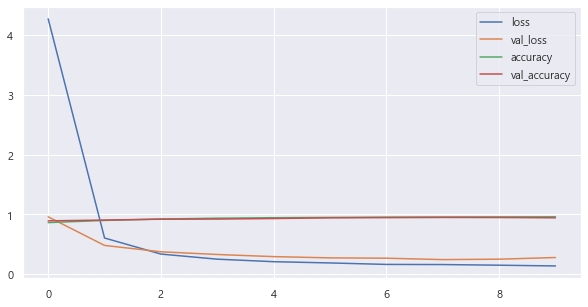

In [13]:
plot_target = ['loss','val_loss', 'accuracy','val_accuracy']
plt.figure(figsize=(10,5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

In [14]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 1ms/step - loss: 0.2450 - accuracy: 0.9507


[0.24495923519134521, 0.9506999850273132]

In [15]:
# 예측된 결과값 리스트
pred_result = model.predict(test_input)

313/313 [==============================] - 0s 1ms/step


In [17]:
pred_labels = np.argmax(pred_result, axis=-1)
pred_labels[:10]
pred_labels.shape

(10000,)

##### 예측 실패한 이미지 파악

In [18]:
wrong_result = []
for i in range(0,len(test_target)):
    if pred_labels[i] != test_target[i]:
        wrong_result.append(i)

len(wrong_result)

493

In [21]:
import random

samples = random.choices(population=wrong_result,k=16)
len(samples)

16

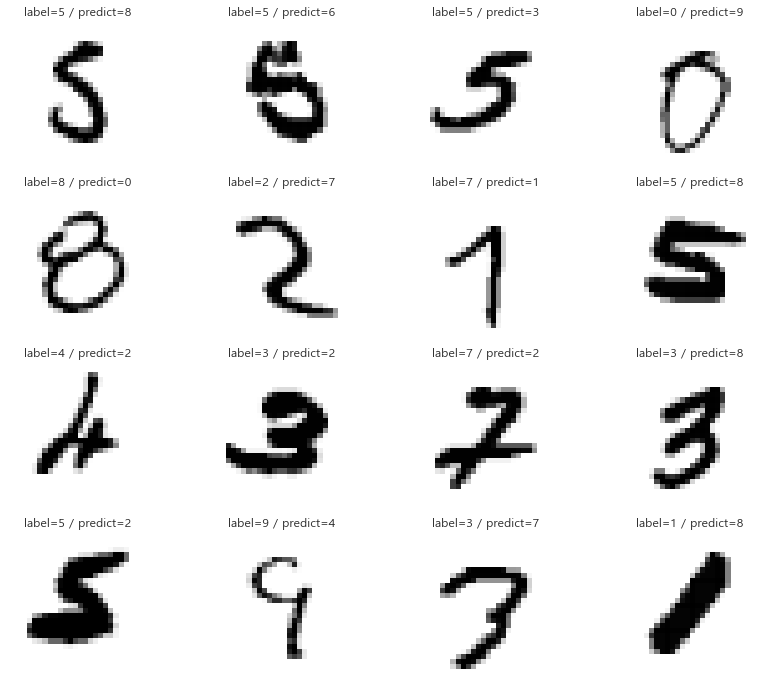

In [24]:
# 예측실패한 이미지 확인
plt.figure(figsize=(14,12))
for idx,n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(test_input[n].reshape(28,28),cmap='gray_r',interpolation='nearest')
    plt.title(f'label={test_target[n]} / predict={pred_labels[n]}')
    plt.axis('off')

plt.show()